# 🚀 Cryptocurrency New All-Time Highs Analysis

## 🎯 **Objective**
This comprehensive analysis explores the relationship between the number of new all-time highs (ATHs) achieved by cryptocurrencies in a given year and subsequent market performance. We investigate whether the frequency of new highs can serve as a predictive indicator for future crypto returns and market cycles.

## 🔍 **Key Research Questions**
1. **How many new ATHs do major cryptocurrencies typically achieve per year?**
2. **Is there a correlation between the number of new highs and same-year performance?**
3. **Can the number of new highs predict next year's crypto market performance?**
4. **What's the probability of positive returns given different thresholds of new highs?**
5. **How do crypto patterns differ from traditional markets (S&P 500)?**

## 📊 **Methodology**
- **Data Source**: Yahoo Finance cryptocurrency data from inception onwards
- **Asset Coverage**: Bitcoin (BTC-USD), Ethereum (ETH-USD), and other major cryptocurrencies
- **New High Definition**: Daily close price exceeding all previous closes within the same calendar year
- **Reset Logic**: New high counter resets to zero at the beginning of each year
- **Analysis Period**: Annual aggregation with year-over-year comparisons
- **Volatility Consideration**: Crypto-specific volatility patterns and market cycles

## 🚀 **Expected Key Findings**

### 📈 **Crypto Market Characteristics**
- **Higher Volatility**: Cryptocurrencies typically show more extreme new high patterns than traditional assets
- **Boom-Bust Cycles**: Clear bull/bear market cycles with dramatic differences in new high frequency
- **Emerging Market Behavior**: Younger asset class with different risk-return profiles

### 🎯 **Predictive Insights Framework**
| New Highs Threshold | Expected Behavior Pattern |
|--------------------|-----------------------------|
| 0 highs            | Bear market / consolidation |
| 1-10 highs         | Sideways / early recovery   |
| 20+ highs          | Strong bull market momentum |
| 50+ highs          | Parabolic bull run phase    |
| 100+ highs         | Extreme euphoria (risk zone)|

### 💡 **Key Analysis Areas**
1. **Volatility Patterns**: How crypto volatility affects new high frequency
2. **Market Cycles**: Identification of bull/bear market phases
3. **Risk Assessment**: Using new highs as momentum and risk indicators
4. **Comparative Analysis**: Crypto vs traditional market behavior
5. **Portfolio Implications**: Risk management using new high thresholds

## 📋 **Analysis Structure**
1. **Data Loading & Selection**: Import crypto data and handle missing values
2. **New Highs Calculation**: Identify and count new ATHs per year with crypto-specific logic
3. **Annual Aggregation**: Calculate yearly statistics, returns, and volatility metrics
4. **Current Year Analysis**: Relationship between new highs and same-year performance
5. **Next Year Prediction**: Predictive power of current year new highs
6. **Probability & Risk Analysis**: Success rates and risk metrics for different thresholds
7. **Comparative Analysis**: Compare patterns across different cryptocurrencies

## 🛠️ **Technical Implementation**
- **Crypto Data Handling**: Managing incomplete data and market cap changes
- **Rolling Maximum Logic**: Track highest close within each year
- **Volatility Adjustments**: Account for crypto-specific price movements
- **Statistical Analysis**: Probability calculations with crypto market considerations
- **Risk Metrics**: Sharpe ratios, maximum drawdowns, and volatility measures

## ⚠️ **Crypto-Specific Considerations**
- **Limited History**: Most cryptocurrencies have shorter data histories than traditional assets
- **Extreme Volatility**: Much higher volatility requires different interpretation of results
- **Market Maturity**: Evolving market structure and institutional adoption
- **Regulatory Impact**: Potential regulatory changes affecting patterns
- **Technology Risk**: Protocol risks and technological developments

## 🎨 **Visualization Strategy**
- **Time Series Plots**: Price evolution with new high markers
- **Scatter Plots**: New highs vs returns relationships
- **Probability Heatmaps**: Success rates across different thresholds
- **Comparative Charts**: Multiple cryptocurrency analysis
- **Risk-Return Plots**: Risk-adjusted performance metrics

---

> **⚠️ Important Disclaimer**: 
> - Cryptocurrency investments are highly speculative and volatile
> - This analysis is for educational and research purposes only
> - Past performance does not guarantee future results
> - Consider your risk tolerance and investment objectives
> - Consult with financial advisors before making investment decisions

In [2]:
# import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Select Yahoo Finance ticker symbol
ticker = "BTC-USD"

# ticker= "^SPX"
#ticker = "FTSEMIB.MI"
#ticker = "DAX"
#ticker = "^FCHI"
#ticker ="^IBEX"
#ticker = "^RUT"
#ticker = "^DJI"
#ticker = "^NDX"

#ticker = "IWDA.AS"
#ticker = "CSSPX.MI"
#ticker = "XLV"

In [4]:
# download historical data from Yahoo Finance
df = yf.download(ticker, start='2015-01-01', end=None)

[*********************100%***********************]  1 of 1 completed


In [5]:
# # Only for BTC-USD downloading data

# # drop year	rolling_max_year	rolling_max_shifted_year	is_new_high_year	new_high_count_year
# df = df.drop(columns=['year', 'rolling_max_year', 'rolling_max_shifted_year', 'is_new_high_year', 'new_high_count_year'])

# # replace "_BTC-USD" with ""
# df.columns = df.columns.str.replace('_BTC-USD', '')

# # download historical data to csv file
# df.to_csv('BTCUSD-1D-2015-01-01.csv') 

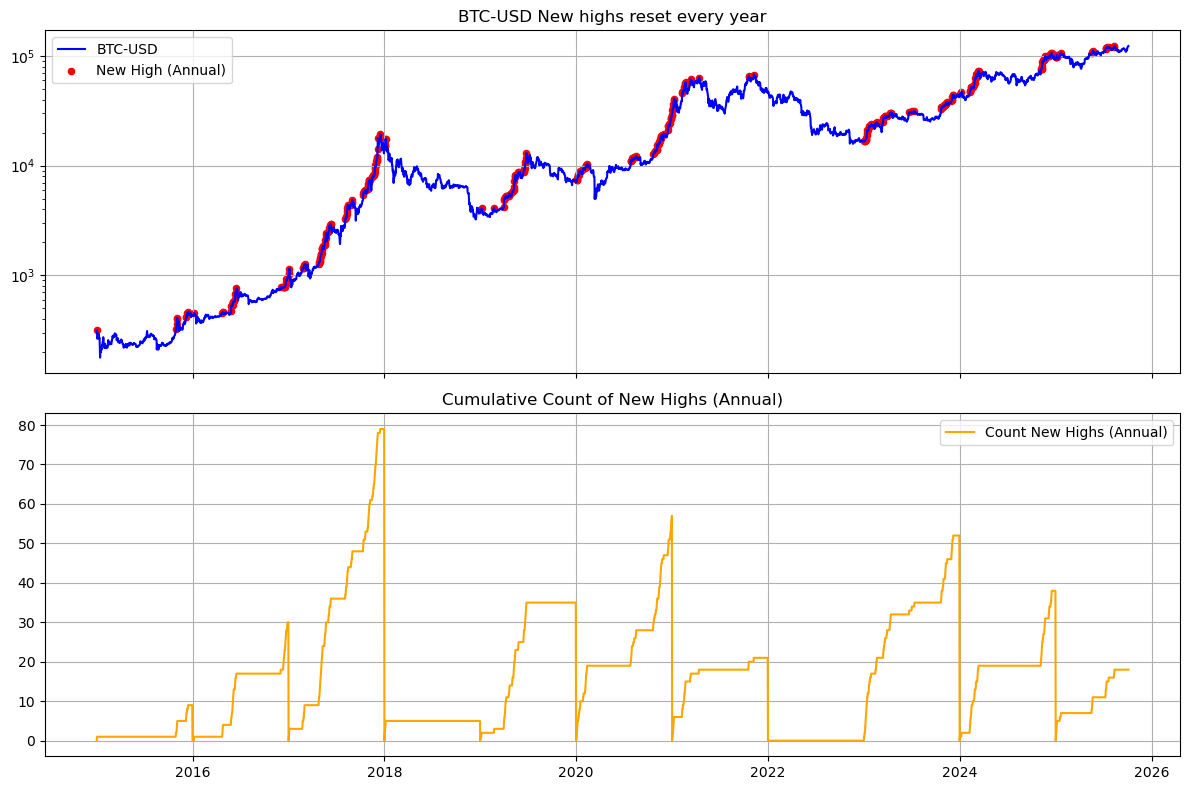

In [6]:
# Flatten the columns if they are a MultiIndex
df.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0]
    for col in df.columns
]
# ('Close', '^GSPC') will become 'Close_^GSPC'.
# If the second level of the MultiIndex is empty, it will return only col[0].

# Systematic Data Cleaning
df.sort_index(inplace=True)
df.dropna(inplace=True)

# Select the correct 'Close' column
close_col = [col for col in df.columns if col.startswith("Close")][0]

# Add a 'year' column for grouping
df['year'] = df.index.year

# Calculate the rolling maximum of the 'Close' price within each year
df['rolling_max_year'] = df.groupby('year')[close_col].cummax()

# Shift the rolling maximum by one day to compare today's close with yesterday's rolling max
df['rolling_max_shifted_year'] = df.groupby('year')['rolling_max_year'].shift(1)

# If today's close > yesterday's rolling max (within the same year) => new high
df['is_new_high_year'] = df[close_col] > df['rolling_max_shifted_year']

# Count cumulatively the new highs, *resetting* at the beginning of each year
df['new_high_count_year'] = df.groupby('year')['is_new_high_year'].cumsum()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First Chart S&P 500, log scale with red dots for new annual highs
axs[0].set_title(f"{ticker} New highs reset every year")
axs[0].semilogy(df[close_col], label=ticker, color='blue')
axs[0].scatter(
    df.index[df['is_new_high_year']],
    df.loc[df['is_new_high_year'], close_col],
    color='red',
    marker='o',
    s=20,
    label='New High (Annual)'
)
axs[0].legend(loc='best')
axs[0].grid(True)

# Second Chart: Cumulative count of new highs, reset every January 1st
axs[1].set_title("Cumulative Count of New Highs (Annual)")
axs[1].plot(
    df['new_high_count_year'],
    color='orange',
    label='Count New Highs (Annual)'
)
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

    year  number_of_new_highs   first_close     last_close  yearly_return_pct
0   2015                    9    314.248993     430.566986          37.014595
1   2016                   30    434.334015     963.742981         121.889824
2   2017                   79    998.325012   14156.400391        1318.015197
3   2018                    5  13657.200195    3742.700439         -72.595405
4   2019                   35   3843.520020    7193.599121          87.161745
5   2020                   57   7200.174316   29001.720703         302.791925
6   2021                   21  29374.152344   46306.445312          57.643512
7   2022                    0  47686.812500   16547.496094         -65.299639
8   2023                   52  16625.080078   42265.187500         154.225467
9   2024                   38  44167.332031   93429.203125         111.534632
10  2025                   18  94419.757812  122989.210938          30.257918

Descriptive Statistics:
              year  number_of_new_highs

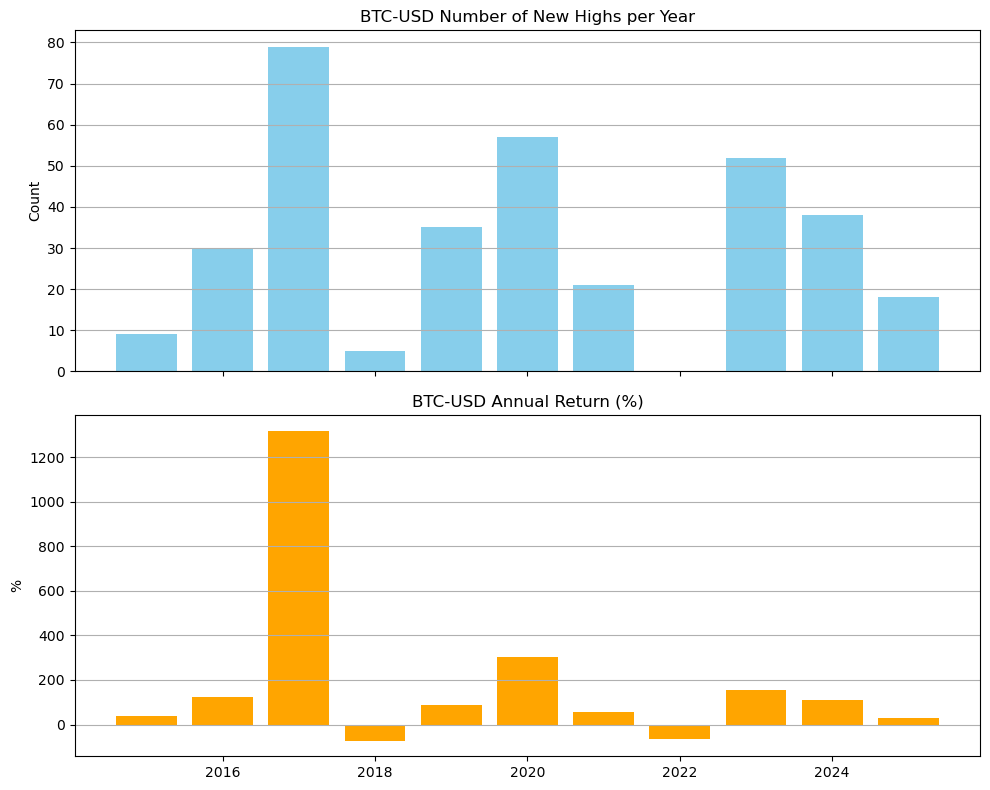

In [7]:
# Select the correct 'Close' column (if needed)
close_col = [col for col in df.columns if col.startswith("Close")][0]

# Group by year to calculate:
yearly_data = (
    df
    .groupby('year')
    .agg(
        number_of_new_highs=('is_new_high_year', 'sum'),  # sum of True values = is_new_high_year
        first_close=(close_col, 'first'),                 # first closing price of the year
        last_close=(close_col, 'last')                    # last closing price of the year
    )
)

# Calculating yearly return in percentage
yearly_data['yearly_return_pct'] = 100.0 * (yearly_data['last_close'] / yearly_data['first_close'] - 1)

# Reset index to show 'year' as a column, for easier printing
yearly_data.reset_index(inplace=True)

# Show the result in a tabular format
print(yearly_data)

# Print some descriptive statistics
print("\nDescriptive Statistics:")
print(yearly_data.describe())

# Plot the results (number of new highs and annual return) in two bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Number of new highs
axes[0].bar(yearly_data['year'], yearly_data['number_of_new_highs'], color='skyblue')
axes[0].set_title(f"{ticker} Number of New Highs per Year")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y')

# Annual return in %
axes[1].bar(yearly_data['year'], yearly_data['yearly_return_pct'], color='orange')
axes[1].set_title(f"{ticker} Annual Return (%)")
axes[1].set_ylabel("%")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [11]:
yearly_data

,year,number_of_new_highs,first_close,last_close,yearly_return_pct,is_positive_year,next_year_return_pct,is_positive_next_year
0,2015,9,314.248993,430.566986,37.014595,True,121.889824,True
1,2016,30,434.334015,963.742981,121.889824,True,1318.015197,True
2,2017,79,998.325012,14156.400391,1318.015197,True,-72.595405,False
3,2018,5,13657.200195,3742.700439,-72.595405,False,87.161745,True
4,2019,35,3843.520020,7193.599121,87.161745,True,302.791925,True
5,2020,57,7200.174316,29001.720703,302.791925,True,57.643512,True
6,2021,21,29374.152344,46306.445312,57.643512,True,-65.299639,False
7,2022,0,47686.812500,16547.496094,-65.299639,False,154.225467,True
8,2023,52,16625.080078,42265.187500,154.225467,True,111.534632,True
9,2024,38,44167.332031,93429.203125,111.534632,True,30.257918,True


In [12]:
yearly_data.describe()

,year,number_of_new_highs,first_close,last_close,yearly_return_pct,next_year_return_pct
count,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000
mean,2020.000000,31.272727,23520.085211,34275.115781,189.330888,204.562518
std,3.316625,24.240837,29066.114149,40305.792067,388.376270,405.906529
min,2015.000000,0.000000,314.248993,430.566986,-72.595405,-72.595405
25%,2017.500000,13.500000,2420.922516,5468.149780,33.636257,37.104317
50%,2020.000000,30.000000,13657.200195,16547.496094,87.161745,99.348188
75%,2022.500000,45.000000,36770.742188,44285.816406,138.057646,146.141556
max,2025.000000,79.000000,94419.757812,122989.210938,1318.015197,1318.015197


===== NEW HIGHS ANALYSIS VS POSITIVE YEARS =====
Total years analyzed: 11

-- Positive Years --
   Min new highs: 9
   Max new highs: 79
   Mean new highs: 37.7

-- Negative Years --
   Min new highs: 0
   Max new highs: 5
   Mean new highs: 2.5

-- Probability of Positive Year Given New Highs Threshold --
   #NewHighs >=  0:  n=11 years,  81.8% positive
   #NewHighs >=  5:  n=10 years,  90.0% positive
   #NewHighs >= 10:  n=8 years,  100.0% positive
   #NewHighs >= 20:  n=7 years,  100.0% positive
   #NewHighs >= 30:  n=6 years,  100.0% positive
   #NewHighs >= 40:  n=3 years,  100.0% positive
   #NewHighs >= 50:  n=3 years,  100.0% positive
   #NewHighs >= 60:  n=1 years,  100.0% positive
   #NewHighs >= 70:  n=1 years,  100.0% positive


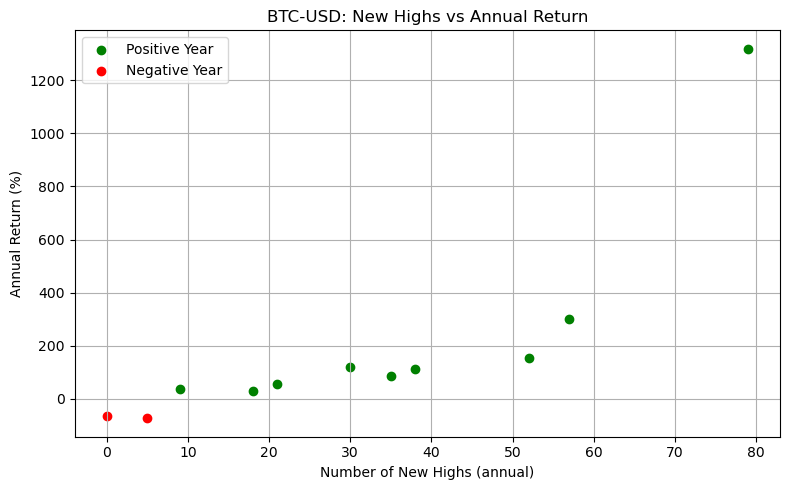

In [9]:
# True column if the year was positive
yearly_data['is_positive_year'] = yearly_data['yearly_return_pct'] > 0

# Split into positive and negative years for descriptive statistics
pos_years = yearly_data[yearly_data['is_positive_year']]
neg_years = yearly_data[~yearly_data['is_positive_year']]

# Print some basic info
print("===== NEW HIGHS ANALYSIS VS POSITIVE YEARS =====")
print(f"Total years analyzed: {len(yearly_data)}")

print("\n-- Positive Years --")
print(f"   Min new highs: {pos_years['number_of_new_highs'].min()}")
print(f"   Max new highs: {pos_years['number_of_new_highs'].max()}")
print(f"   Mean new highs: {pos_years['number_of_new_highs'].mean():.1f}")

print("\n-- Negative Years --")
print(f"   Min new highs: {neg_years['number_of_new_highs'].min()}")
print(f"   Max new highs: {neg_years['number_of_new_highs'].max()}")
print(f"   Mean new highs: {neg_years['number_of_new_highs'].mean():.1f}")

# Show the probability of a positive year given a certain threshold of new highs
print("\n-- Probability of Positive Year Given New Highs Threshold --")
thresholds = [0, 5, 10, 20, 30, 40, 50, 60, 70]  # example thresholds

for t in thresholds:
    subset = yearly_data[yearly_data['number_of_new_highs'] >= t]
    if len(subset) > 0:
        prob_pos = 100.0 * subset['is_positive_year'].mean()
        print(f"   #NewHighs >= {t:2d}:  n={len(subset)} years,  {prob_pos:.1f}% positive")
    else:
        print(f"   #NewHighs >= {t:2d}:  no historical year with >= {t} new highs")

# Scatter Plot: # new highs (X) vs. annual return (Y)
plt.figure(figsize=(8, 5))
plt.title(f"{ticker}: New Highs vs Annual Return")
plt.xlabel("Number of New Highs (annual)")
plt.ylabel("Annual Return (%)")

# - Positive years in green, negative years in red
plt.scatter(
    pos_years['number_of_new_highs'],
    pos_years['yearly_return_pct'],
    color='green', label='Positive Year'
)
plt.scatter(
    neg_years['number_of_new_highs'],
    neg_years['yearly_return_pct'],
    color='red', label='Negative Year'
)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

===== NEW HIGHS ANALYSIS VS NEXT YEAR =====
Total years analyzed (with next year present): 10

-- Years with Next Year Positive --
   Min new highs (current year): 0
   Max new highs (current year): 57
   Mean new highs: 28.2

-- Years with Next Year Negative --
   Min new highs (current year): 18
   Max new highs (current year): 79
   Mean new highs: 39.3

-- Probability of Positive Next Year Given New Highs Threshold --
   #NewHighs >=  0:  n=11 years,  72.7% positive next
   #NewHighs >=  5:  n=10 years,  70.0% positive next
   #NewHighs >= 10:  n=8 years,  62.5% positive next
   #NewHighs >= 20:  n=7 years,  71.4% positive next
   #NewHighs >= 30:  n=6 years,  83.3% positive next
   #NewHighs >= 40:  n=3 years,  66.7% positive next
   #NewHighs >= 50:  n=3 years,  66.7% positive next
   #NewHighs >= 60:  n=1 years,  0.0% positive next
   #NewHighs >= 70:  n=1 years,  0.0% positive next


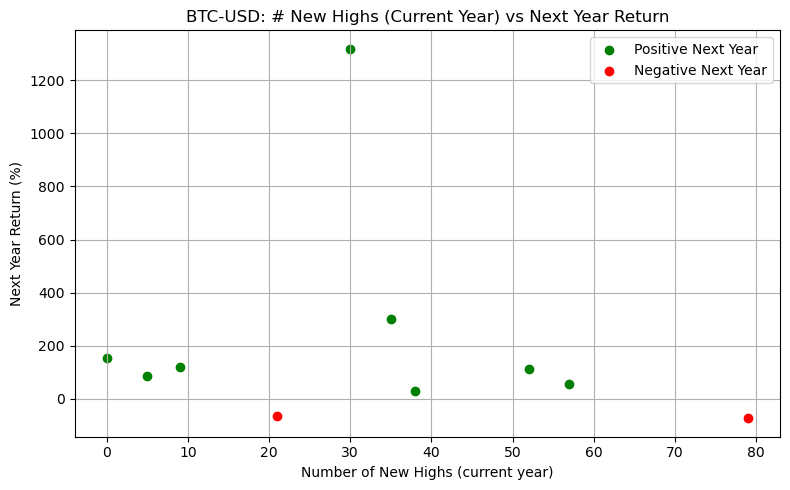

In [10]:
# Starting from 'yearly_data' DataFrame created above
yearly_data = yearly_data.sort_values('year')

# Add the column with NEXT YEAR'S RETURN
yearly_data['next_year_return_pct'] = yearly_data['yearly_return_pct'].shift(-1)

# True column if the NEXT year was positive
yearly_data['is_positive_next_year'] = yearly_data['next_year_return_pct'] > 0

# Split into "years with next year positive" and "years with next year negative"
pos_next = yearly_data[yearly_data['is_positive_next_year']]
neg_next = yearly_data[~yearly_data['is_positive_next_year']]

# Print some basic info
print("===== NEW HIGHS ANALYSIS VS NEXT YEAR =====")
print(f"Total years analyzed (with next year present): {len(yearly_data) - 1}")
# (the last year does not have a "next year" in the data, so one row is lost in shift)

print("\n-- Years with Next Year Positive --")
if len(pos_next) > 0:
    print(f"   Min new highs (current year): {pos_next['number_of_new_highs'].min()}")
    print(f"   Max new highs (current year): {pos_next['number_of_new_highs'].max()}")
    print(f"   Mean new highs: {pos_next['number_of_new_highs'].mean():.1f}")
else:
    print("   No year with next positive (strange!)")

print("\n-- Years with Next Year Negative --")
if len(neg_next) > 0:
    print(f"   Min new highs (current year): {neg_next['number_of_new_highs'].min()}")
    print(f"   Max new highs (current year): {neg_next['number_of_new_highs'].max()}")
    print(f"   Mean new highs: {neg_next['number_of_new_highs'].mean():.1f}")
else:
    print("   No year with next negative (luckily!)")

# Show the probability of a positive next year given a certain threshold of new highs in the current year
print("\n-- Probability of Positive Next Year Given New Highs Threshold --")
thresholds = [0, 5, 10, 20, 30, 40, 50, 60, 70]

for t in thresholds:
    subset = yearly_data[yearly_data['number_of_new_highs'] >= t]
    # Only years that exceed the 't' threshold of new highs
    # (Note: the last year in the dataset does not have "next_year_return_pct", so subset may exclude it)
    if len(subset) > 0:
        prob_pos = 100.0 * subset['is_positive_next_year'].mean()
        print(f"   #NewHighs >= {t:2d}:  n={len(subset)} years,  {prob_pos:.1f}% positive next")
    else:
        print(f"   #NewHighs >= {t:2d}:  no historical year with >= {t} new highs")

# Plot:
#    Asse X = Number of new highs in the current year
#    Asse Y = Annual return of the next year
plt.figure(figsize=(8, 5))
plt.title(f"{ticker}: # New Highs (Current Year) vs Next Year Return")
plt.xlabel("Number of New Highs (current year)")
plt.ylabel("Next Year Return (%)")

# - Years with positive next year in green, negative next year in red
plt.scatter(
    pos_next['number_of_new_highs'],
    pos_next['next_year_return_pct'],
    color='green', label='Positive Next Year'
)
plt.scatter(
    neg_next['number_of_new_highs'],
    neg_next['next_year_return_pct'],
    color='red', label='Negative Next Year'
)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()